# EDA notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

## Exploration

In [2]:
# Loaded variable 'df' from URI: c:\Users\sieun\OneDrive - Imperial College London\Documents\Courses\Data Glacier\Week 2\DataSets-main\Cab_Data.csv
df1 = pd.read_csv(r'c:\\Users\\sieun\\OneDrive - Imperial College London\\Documents\\Courses\\Data Glacier\\Week 2\\DataSets-main\\Cab_Data.csv')
df2 = pd.read_csv(r'c:\\Users\\sieun\\OneDrive - Imperial College London\\Documents\\Courses\\Data Glacier\\Week 2\\DataSets-main\\Customer_ID.csv')
df3 = pd.read_csv(r'c:\\Users\\sieun\\OneDrive - Imperial College London\\Documents\\Courses\\Data Glacier\\Week 2\\DataSets-main\\Transaction_ID.csv')
df4 = pd.read_csv(r'c:\\Users\\sieun\\OneDrive - Imperial College London\\Documents\\Courses\\Data Glacier\\Week 2\\DataSets-main\\City.csv')

In [3]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')
Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')
Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')
Index(['City', 'Population', 'Users'], dtype='object')


In [4]:
df1.info()
print("-----------------\n")

df2.info()
print("-----------------\n")

df3.info()
print("-----------------\n")

df4.info()
print("-----------------\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
-----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64

In [5]:
# Convert 'Population' and 'Users' columns to integer
df4['Population'] = df4['Population'].str.replace(',', '').astype(int)
df4['Users'] = df4['Users'].str.replace(',', '').astype(int)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 452.0+ bytes


# Hypothesis

### Hypothesis 1: Profitablity

**Hypothesis**: The profitability (revenue - cost) of each cab company varies significantly by city.

**Rationale**: Understanding which cities generate higher profits can guide investment decisions towards companies with stronger market presence in profitable areas.

**Analysis Approach**: Calculate total profit for each company in each city, then compare the profitability.

In [6]:
# Load datasets
cab_data = df1
city_data = df4

# Calculate profit
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']

# Group by company and city
profit_by_city = cab_data.groupby(['Company', 'City'])['Profit'].sum().reset_index()

# Merge with city data for population and user context
merged_data = pd.merge(profit_by_city, city_data, on='City', how='left')
merged_data


,Company,City,Profit,Population,Users
0,Pink Cab,ATLANTA GA,9.605008e+04,814885,24701
1,Pink Cab,AUSTIN TX,1.474453e+05,698371,14978
2,Pink Cab,BOSTON MA,2.620017e+05,248968,80021
3,Pink Cab,CHICAGO IL,3.187225e+05,1955130,164468
4,Pink Cab,DALLAS TX,2.473011e+04,942908,22157
5,Pink Cab,DENVER CO,4.058494e+04,754233,12421
6,Pink Cab,LOS ANGELES CA,1.125732e+06,1595037,144132
7,Pink Cab,MIAMI FL,1.623012e+05,1339155,17675
8,Pink Cab,NASHVILLE TN,6.428453e+04,327225,9270
9,Pink Cab,NEW YORK NY,1.511474e+06,8405837,302149


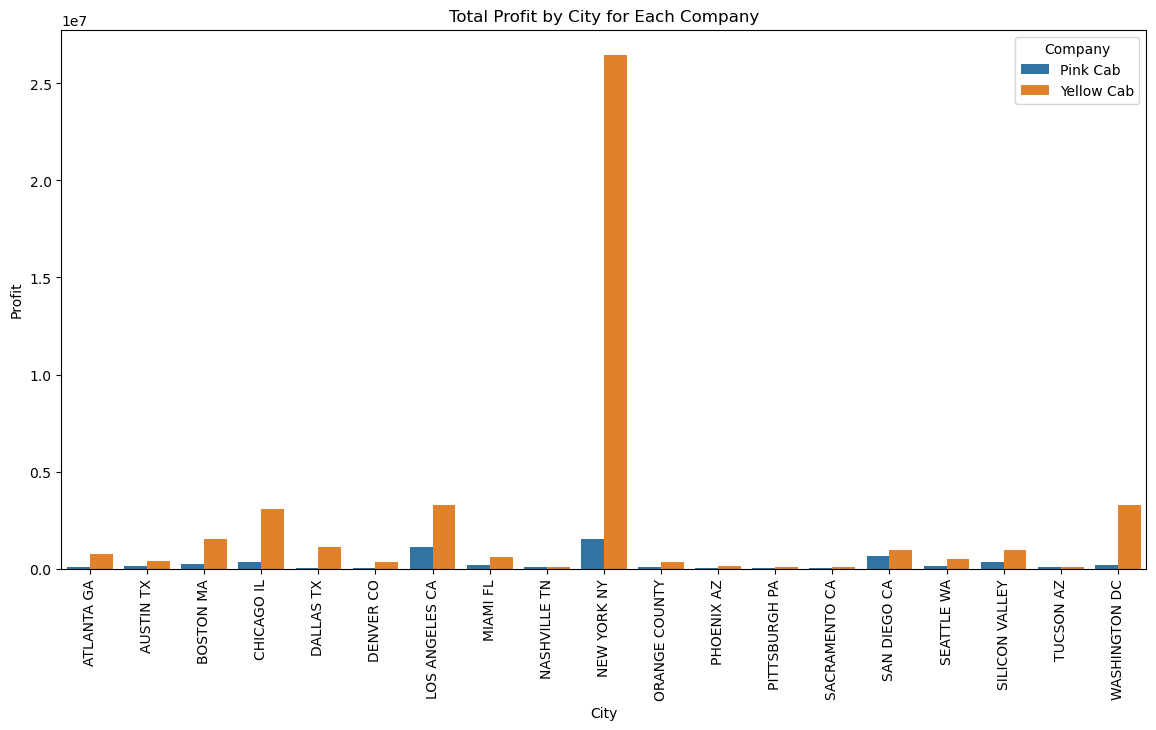

In [7]:
# Visualization 
plt.figure(figsize=(14, 7))
sns.barplot(data=merged_data, x='City', y='Profit', hue='Company')
plt.title('Total Profit by City for Each Company')
plt.xticks(rotation=90)
plt.show()

### Hypothesis 2: Average revenue per kilometer
**Hypothesis**: The average revenue per kilometer differs between the two companies.

**Rationale**: Revenue efficiency per kilometer indicates how well each company is monetizing its services.

**Analysis Approach**: Calculate and compare the average revenue per kilometer for both companies.

In [8]:
# Calculate revenue per kilometer
cab_data['Revenue per KM'] = cab_data['Price Charged'] / cab_data['KM Travelled']

# Group by company to find the mean revenue per kilometer
avg_revenue_per_km = cab_data.groupby('Company')['Revenue per KM'].mean().reset_index()


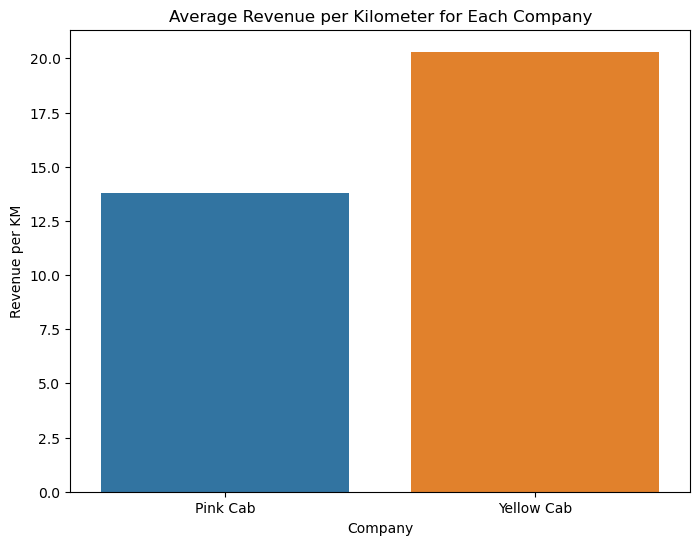

In [9]:
# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_revenue_per_km, x='Company', y='Revenue per KM')
plt.title('Average Revenue per Kilometer for Each Company')
plt.show()


### Hypothesis 3: Customer Demographics Impact on Revenue
**Hypothesis**: Different demographics (age, gender, income) of customers influence the revenue generated for each company.

**Rationale**: Identifying key demographics that drive higher revenue can target marketing strategies effectively.

**Analysis Approach**: Merge datasets to analyze the relationship between demographics and revenue.


In [10]:
# Load datasets
customer_data = df2
transaction_data = df3

# Merge datasets
merged_data = pd.merge(cab_data, transaction_data, on='Transaction ID')
merged_data = pd.merge(merged_data, customer_data, on='Customer ID')

print(merged_data)

# Group by demographic variables
demographic_revenue = merged_data.groupby(['Company', 'Gender', 'Age', 'Income (USD/Month)'])['Price Charged'].sum().reset_index()


        Transaction ID  Date of Travel     Company            City  \
0             10000011           42377    Pink Cab      ATLANTA GA   
1             10351127           43302  Yellow Cab      ATLANTA GA   
2             10412921           43427  Yellow Cab      ATLANTA GA   
3             10000012           42375    Pink Cab      ATLANTA GA   
4             10320494           43211  Yellow Cab      ATLANTA GA   
...                ...             ...         ...             ...   
359387        10439790           43107  Yellow Cab      SEATTLE WA   
359388        10439799           43103  Yellow Cab  SILICON VALLEY   
359389        10439838           43104  Yellow Cab       TUCSON AZ   
359390        10439840           43106  Yellow Cab       TUCSON AZ   
359391        10439846           43104  Yellow Cab       TUCSON AZ   

        KM Travelled  Price Charged  Cost of Trip    Profit  Revenue per KM  \
0              30.45         370.95      313.6350   57.3150       12.182266   
1

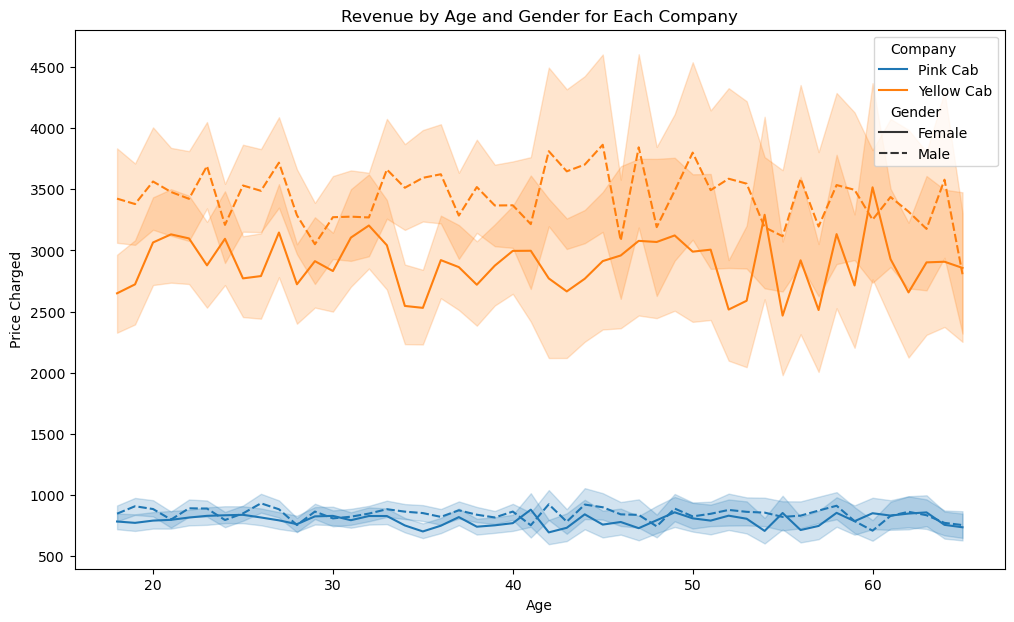

In [18]:
# Visualization
plt.figure(figsize=(12, 7))
sns.lineplot(data=demographic_revenue, x='Age', y='Price Charged', hue='Company', style='Gender')
plt.title('Revenue by Age and Gender for Each Company')
plt.show()

### Hypothesis 4: Impact of Payment Mode on Transaction Volume
**Hypothesis**: The mode of payment significantly affects the transaction volume for each company.

**Rationale**: Understanding customer payment preferences can improve transaction efficiency and customer satisfaction.

**Analysis Approach**: Analyze transaction volumes based on payment modes.

In [12]:
# Group by company and payment mode to count transactions
payment_mode_counts = merged_data.groupby(['Company', 'Payment_Mode'])['Transaction ID'].count().reset_index()

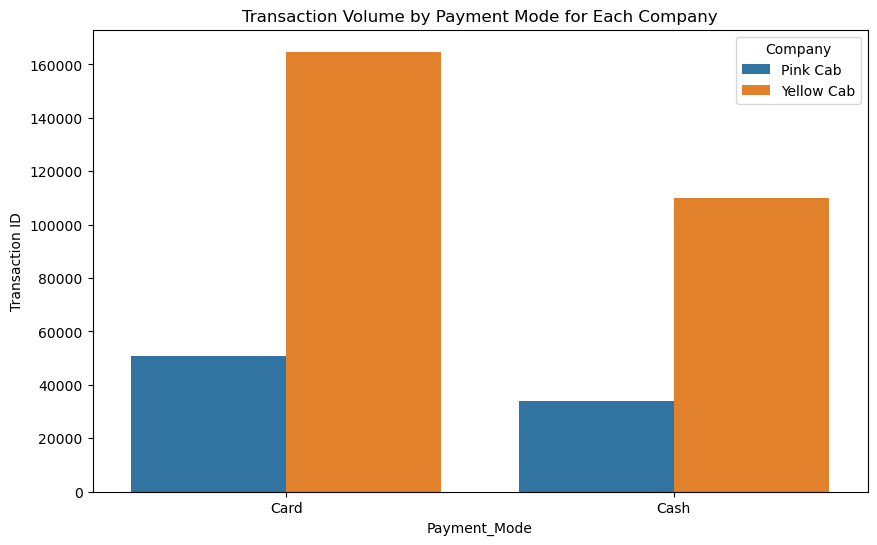

In [13]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_mode_counts, x='Payment_Mode', y='Transaction ID', hue='Company')
plt.title('Transaction Volume by Payment Mode for Each Company')
plt.show()


### Hypothesis 5: Market Penetration in High Population Cities
**Hypothesis**: Higher population cities have a higher number of cab users, affecting market penetration for each company.

**Rationale**: Evaluating market penetration in densely populated areas can indicate potential for growth and market dominance.

**Analysis Approach**: Compare the number of users to the population for each city and each company.

In [14]:
# Merge cab data with city data
city_user_data = pd.merge(cab_data, city_data, on='City')

# Group by company and city to find number of users
users_by_city = city_user_data.groupby(['Company', 'City'])['City'].count().reset_index(name='Number of Users')

# Merge with city population data
users_population_data = pd.merge(users_by_city, city_data, on='City')

users_population_data.info()

# Calculate market penetration
users_population_data['Market Penetration'] = users_population_data['Number of Users'] / users_population_data['Population']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company          38 non-null     object
 1   City             38 non-null     object
 2   Number of Users  38 non-null     int64 
 3   Population       38 non-null     int32 
 4   Users            38 non-null     int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 1.5+ KB


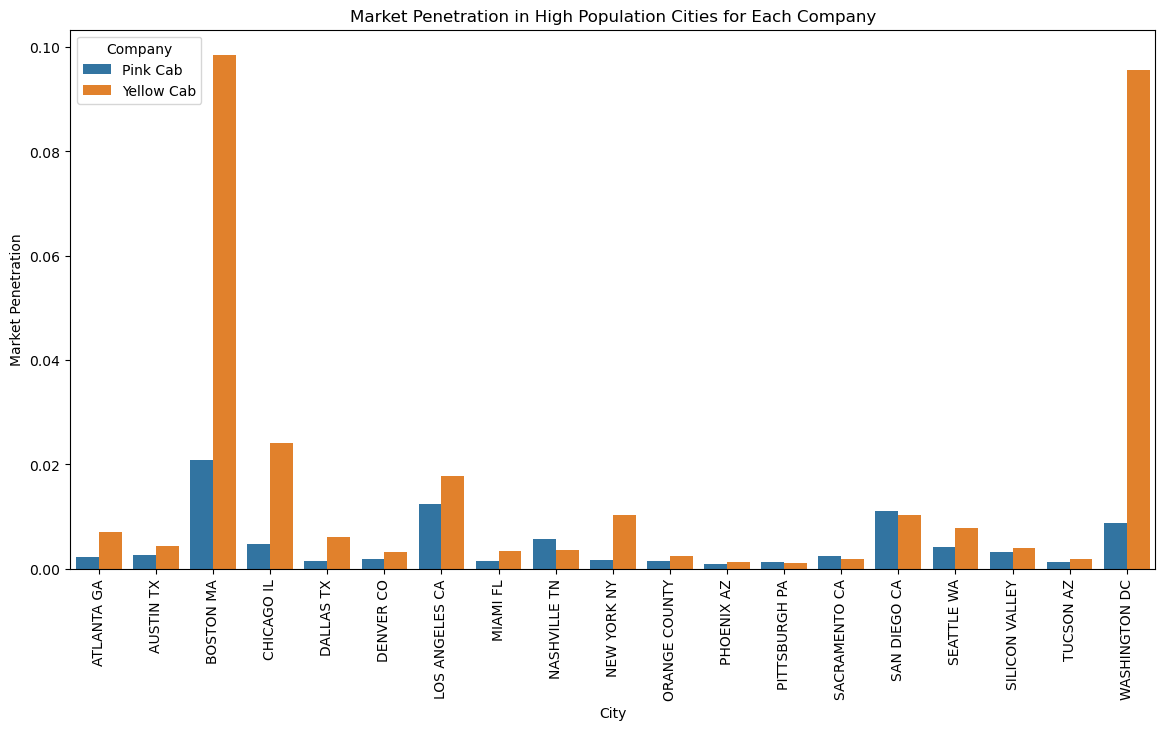

In [15]:
# Visualization
plt.figure(figsize=(14, 7))
sns.barplot(data=users_population_data, x='City', y='Market Penetration', hue='Company')
plt.title('Market Penetration in High Population Cities for Each Company')
plt.xticks(rotation=90)
plt.show()


### Hypothesis 6: Customer Retention Rate
**Hypothesis**: One company has a higher customer retention rate than the other.

**Rationale**: High customer retention indicates customer satisfaction and brand loyalty, crucial for long-term business sustainability.

**Analysis Approach**: Analyze repeat customers for each company.

In [16]:
# Count number of transactions per customer for each company
customer_transactions = merged_data.groupby(['Company', 'Customer ID'])['Transaction ID'].count().reset_index()

# Define retention as customers with more than one transaction
customer_transactions['Retention'] = customer_transactions['Transaction ID'] > 1

# Calculate retention rate for each company
retention_rate = customer_transactions.groupby('Company')['Retention'].mean().reset_index()

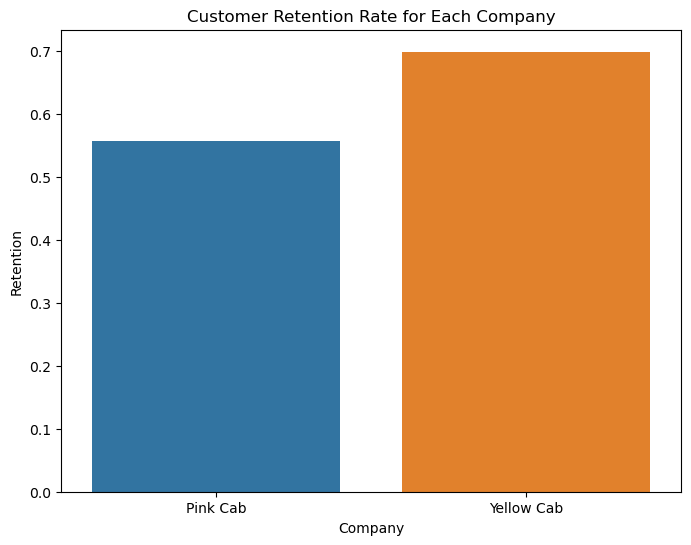

In [17]:
# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(data=retention_rate, x='Company', y='Retention')
plt.title('Customer Retention Rate for Each Company')
plt.show()
